# bkds case study - prediction

In [8]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load ny dataset
def load_df(df_file):
    basepath = 'data/'
    filepath = basepath + df_file
    load_df = pd.DataFrame.from_csv(filepath)
    return load_df

In [5]:
ny_df = load_df('processed_ny_df.csv')

In [6]:
ny_df.head()

,Bedrooms,Capacity,Id,Price,Property_Type,Review_Count,Room_Type,Star_Rating
0,1,2,6882689,198,Apartment,17,2,5
1,2,7,12022627,2200,Apartment,0,2,0
2,1,2,8940740,149,Apartment,6,2,5
3,1,4,12035970,55,Apartment,0,2,0
4,1,2,11642165,65,Apartment,3,1,5


### Linear Regression

Earlier we saw that Capacity and Room Type were particularly correlated to Price, so let's fit a simple linear regression model on them. Price and capacity are both skewed, so we'll log transform these variables

In [9]:
ny_df['log_Price'] = np.log(ny_df.Price)
ny_df['log_Capacity'] = np.log(ny_df.Capacity)

In [10]:
ny_df.head()

,Bedrooms,Capacity,Id,Price,Property_Type,Review_Count,Room_Type,Star_Rating,log_Price,log_Capacity
0,1,2,6882689,198,Apartment,17,2,5,5.288267,0.693147
1,2,7,12022627,2200,Apartment,0,2,0,7.696213,1.945910
2,1,2,8940740,149,Apartment,6,2,5,5.003946,0.693147
3,1,4,12035970,55,Apartment,0,2,0,4.007333,1.386294
4,1,2,11642165,65,Apartment,3,1,5,4.174387,0.693147


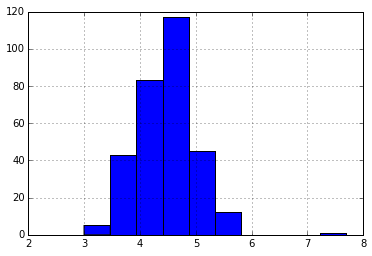

In [11]:
ny_df.log_Price.hist()

In [12]:
# That one point is still an outlier, I'm going to remove it

In [13]:
ny_df = ny_df[ny_df.log_Price<7]

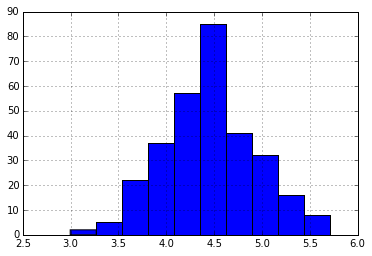

In [14]:
ny_df.log_Price.hist()

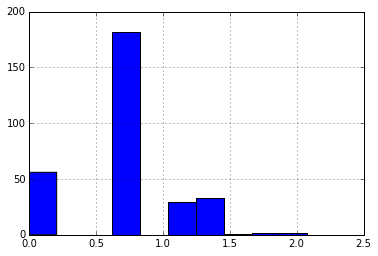

In [15]:
ny_df.log_Capacity.hist()

In [18]:
# create X and y
feature_cols = ['log_Capacity', 'Room_Type']
X = ny_df[feature_cols]
y = ny_df.log_Price

/Users/paulsingman/pyth/data-analysis/venv/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


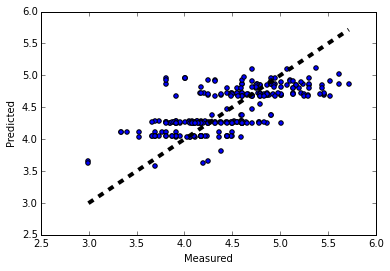

In [20]:
from sklearn.cross_validation import cross_val_predict
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# developed cross validated predictions 
predict = cross_val_predict(lr, X, y, cv=5)

fig, ax = plt.subplots()
ax.scatter(y, predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [22]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
preds = lr.predict(X_test)

In [26]:
from sklearn import metrics

In [27]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, preds))

In [28]:
rmse

0.33698208789084583

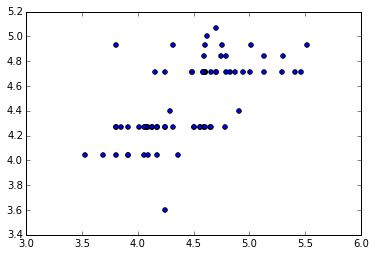

In [31]:
plt.scatter(y_test, preds)

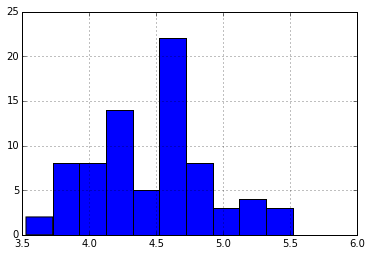

In [32]:
y_test.hist()

In [33]:
resid = y_test - preds

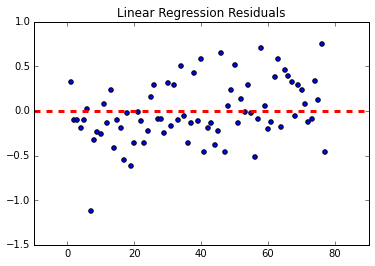

In [43]:
plt.scatter(np.linspace(1,77,77),resid)
plt.axhline(ls='--', linewidth=3, color='r')
plt.title('Linear Regression Residuals')

In [38]:
zip(feature_cols, lr.coef_)

[('log_Capacity', 0.32209631983939224), ('Room_Type', 0.44286309564548182)]

In [39]:
lr.intercept_

3.60110475877058